In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

current_font_list= matplotlib.rcParams['font.family']

font_path ="C:\Windows\Fonts\GULIM.TTC"
kfont = matplotlib.font_manager.FontProperties(fname= font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

pd_data = pd.read_csv('park.csv')
pd_data

,지자체명,공원구분,공원명,위도,경도,공원면적,지정고시일
0,서울특별시,소공원,녹색소공원,37.539217,126.962694,1569.9,2012-10-19
1,세종특별자치시,소공원,푸름샘 소공원(소1-1),36.516117,127.233781,1820.0,2011-08-05
2,세종특별자치시,소공원,솔숲 소공원(소1-2),36.508995,127.230040,1037.0,2011-08-05
3,세종특별자치시,수변공원,마디꽃 수변공원(수1-1),36.495962,127.257316,4928.0,2007-07-04
4,세종특별자치시,수변공원,꽃 수변공원(수2-3),36.473133,127.254482,3575.0,2009-01-07
...,...,...,...,...,...,...,...
17576,서울특별시,기타,방배,37.474225,126.995298,210517.2,NaN
17577,서울특별시,기타,말죽거리,37.480885,127.030469,280822.6,NaN
17578,서울특별시,근린공원,서리풀,37.484654,127.000420,465938.3,NaN
17579,서울특별시,근린공원,방배,37.470535,126.989600,74847.6,NaN


### heatmap
* 지자체명 vs. 공원구분
* 평균 공원면적
    - groupby 이용

In [27]:
g1 = pd_data.groupby(['지자체명', '공원구분'])
pd_data['지자체명'].unique()
df_group = g1.mean()

df_group_pv = df_group.reset_index().pivot('지자체명', '공원구분', '공원면적')
sns.heatmap(df_group_pv)

# pd_data.pivot('지자체명', '공원구분', '공원면적')

array([ 114,    7,    1,    2,   20,  142,    9,  335,    5,    8, 1007,
        391,   12,  123,  513,  110, 2126,   38,  104,  257,    3,   32,
        198,   19,  617,   16,   21,  197,   23,  147,   28,  599,   13,
         10,  189,  103,  560,  141,   56,    6,  401,   81,   14,   47,
        279,   11,   18,  111,  369,    4,  368,   71,   49,   26,  249,
       1146,   17,   34,   57,   84,  302,  206,   44,  417,  208,   63,
        329,   48,  339,   15,  218,  107,  305,   76,  151,  443,  385,
         37,  794,   33,  224,   27,  359], dtype=int64)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_6676\610583823.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv = df_group.reset_index().pivot('지자체명', '공원구분', '공원명')


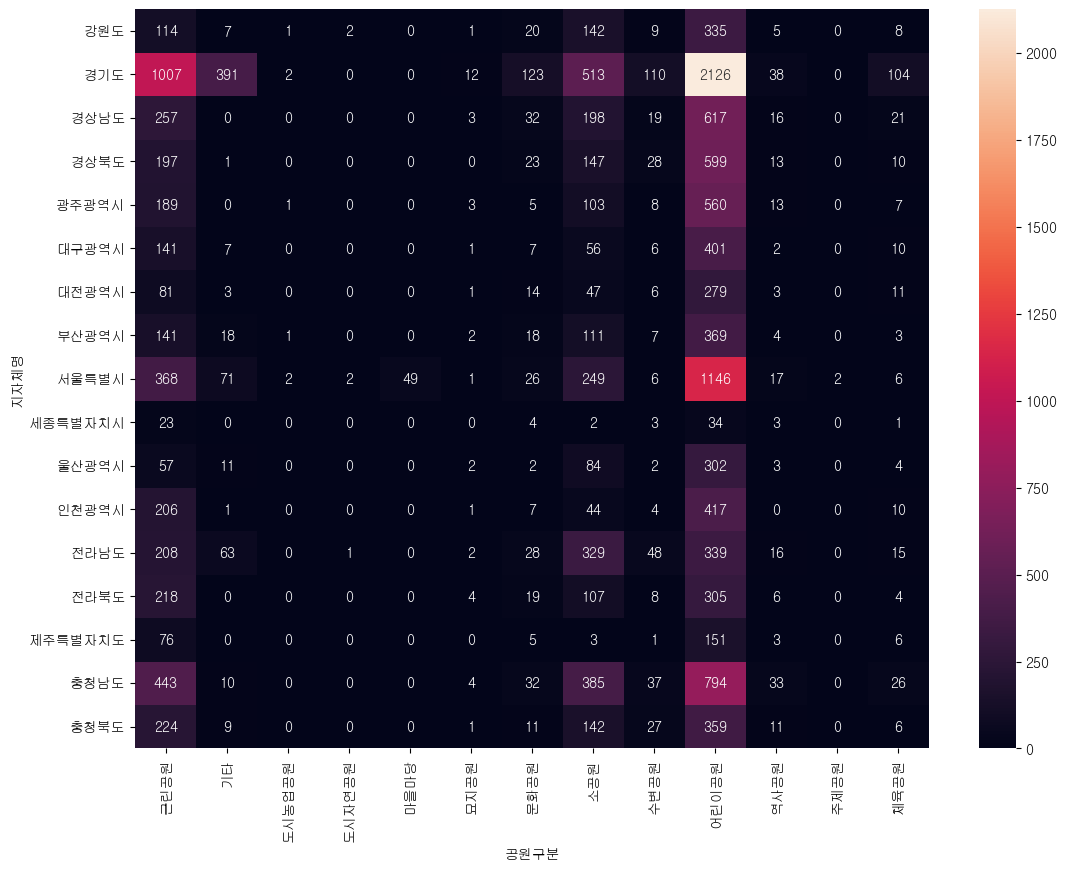

In [38]:
g2 = pd_data.groupby(['지자체명', '공원구분'])
df_group = g1.count()

df_group_pv = df_group.reset_index().pivot('지자체명', '공원구분', '공원명')
fig = plt.figure(figsize = (6.4 * 2, 4.8 *2))
ax1 = fig.add_subplot()
r = sns.heatmap(df_group_pv.fillna(0.0), annot=True, fmt = '.0f', ax = ax1)

# pd_data.pivot('지자체명', '공원구분', '공원면적')